In [111]:
from ClassesSim import MCCTClassical
import numpy as np
import matplotlib.pyplot as plt
import fractions
import random
import itertools
import scipy

In [112]:
mod = MCCTClassical(10,2,1000,100000,[0,10],[0,10,50,100],2,-1,perLatSweep=False)

In [113]:
pctrl = .5
pbern=0.2
pMC=0.3
pstoch = pctrl+pbern

In [118]:
rand = random.random()
mod.createSamplingArrays()
mod.createLattice()
betarange = np.geomspace(0.01,1,10)
# [prob control relative to bernoulli, prob mc relative to stochastic]
probtuple = np.array(([0,0],[0,1],[1,1],[1,.5],[.5,.5],[1,0]))
lp = len(probtuple)
lb = len(betarange)
time=100
mag = np.zeros((time,lb,lp))
magS = np.zeros((time,lb,lp))
rec1 = np.zeros((time,lb,lp))
rec2 = np.zeros((time,lb,lp))
rec3 =np.zeros((time,lb,lp))

for b in range(lb):
    beta = betarange[b]
    mod.LookupEnergyLad2d(-1,beta)

    for p in range(lp):
        pctrl,pMC=probtuple[p]
        for j in range(time):
            for i in itertools.repeat(None,500):
                if random.random() >=pMC:
                    # there is an error here which I am not sure how to fix
                    # the current implementation uses <= so that for a probability of 1, the action is always taken
                    # however, if the probability is 0, there is a nonzero chance of the action being taken
                    # if I use <, then for a probability of 1, there is a nonzero chance of the action not being taken
                    if random.random()<pctrl: 
                        mod.lattice[0]=mod.control(mod.lattice[0])
                    else:
                        mod.lattice[0] =mod.bernoulli(mod.lattice[0])
                    if random.random()<pctrl:
                        mod.lattice[1]= mod.control(mod.lattice[1])
                    else:
                        mod.lattice[1]= mod.bernoulli(mod.lattice[1])

                else:
                    mod.monteCarloLadder(1,1,1,1)
            magS[j,b,p]=mod.StaggeredMagnetization()
            mag[j,b,p]=mod.Magnetization()
            rec1[j,b,p]=mod.order_parameter(mod.lattice[0])
            rec2[j,b,p]= mod.order_parameter(mod.lattice[1])
            rec3[j,b,p] = mod.LatticeOrderParameterLad()

/Users/joshuakarten/VSCODE/LabResearch/.venv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:557: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/joshuakarten/VSCODE/LabResearch/.venv/lib/python3.12/site-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


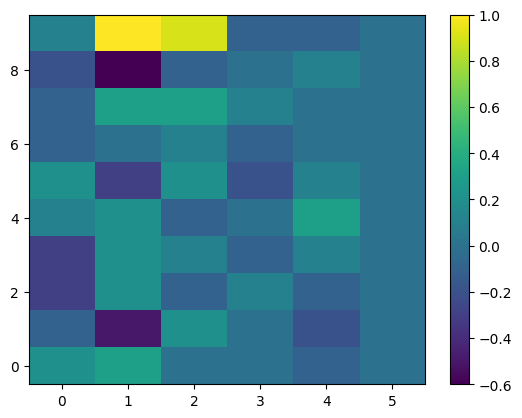

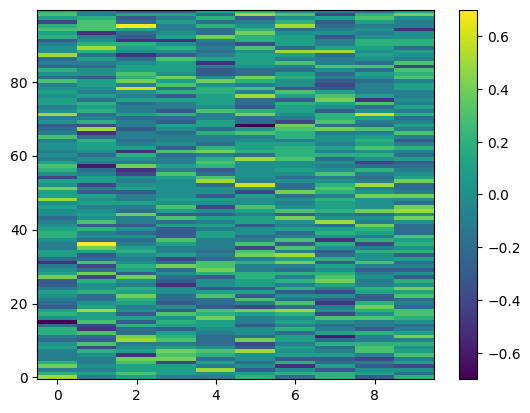

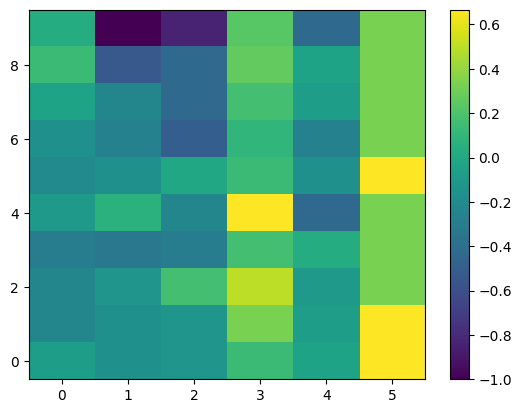

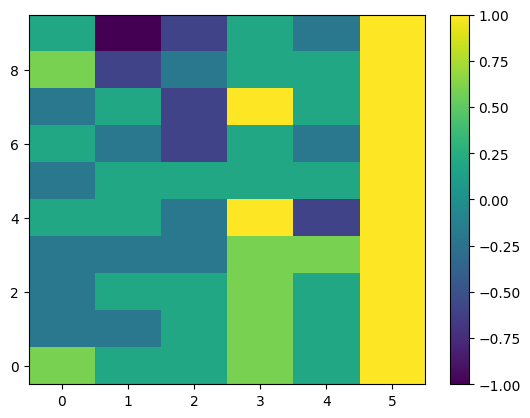

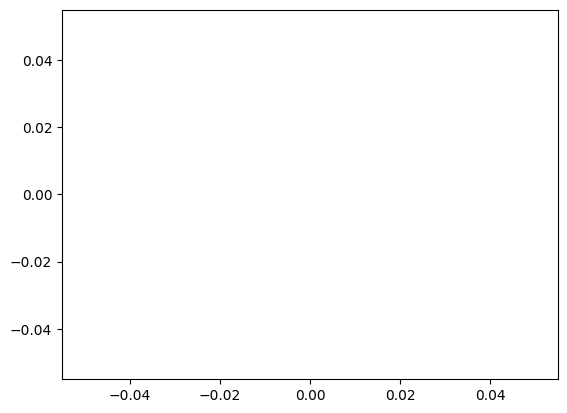

In [119]:
fig,ax=plt.subplots()
r=ax.imshow(mag[-1,:,:],aspect='auto',origin='lower')
fig.colorbar(r)
fig,ax=plt.subplots()
r=ax.imshow(mag[:,:,0],aspect='auto',origin='lower')
fig.colorbar(r)
fig,ax=plt.subplots()
r=ax.imshow(rec3[-1,:,:],aspect='auto',origin='lower')
fig.colorbar(r)
fig,ax=plt.subplots()
r=ax.imshow(rec1[-1,:,:],aspect='auto',origin='lower')
fig.colorbar(r)
fig,ax=plt.subplots()
ax.plot(np.average(rec1[500:,:,4],axis=0))

In [82]:
randin=random.getrandbits(10)
print(randin)
for i in itertools.repeat(None,10):
    randin=mod.bernoulli(randin)
    print(randin)

233
464
932
845
670
318
632
242
486
974
924
